In [144]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.image import imread

In [145]:
# Recreate the model architecture
from tensorflow.keras import models, layers, applications

base = applications.EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3),
    pooling='avg'
)

inputs = layers.Input(shape=(224, 224, 3))
x = base(inputs, training=False)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
outputs = layers.Dense(6, activation='softmax')(x)
model = models.Model(inputs, outputs)

# Load the weights into this architecture
model.load_weights("dominator.h5")


In [146]:
from tensorflow.keras.preprocessing import image

In [241]:
my_image = image.load_img('./test_images/img1.jpeg',target_size=(224,224,3))

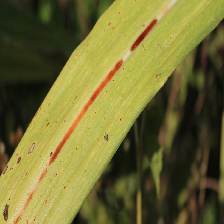

In [242]:
my_image

In [243]:
my_image = image.img_to_array(my_image)

In [244]:
my_image = np.expand_dims(my_image, axis=0)

In [245]:
pred=model.predict(my_image)

1/1 [==============================] - 0s 76ms/step


In [264]:
class_idx = np.argmax(pred)
print("Predicted class:", class_idx)

Predicted class: 4


In [265]:
pred

array([[2.8125325e-04, 1.3312446e-05, 3.5454919e-05, 4.4589493e-02,
        9.4676757e-01, 8.3128670e-03]], dtype=float32)

In [266]:
label_dict = {0:'BacterialBlights',
1:'Healthy',
2:'Mosaic',
3:'RedRot',
4:'Rust',
5:'Yellow'}

In [267]:
solution_dict = {
    0: 'Use copper-based bactericides; avoid water stagnation and practice crop rotation.',
    1: 'No treatment needed; maintain proper irrigation and regular crop monitoring.',
    2: 'Control aphid vectors with neem oil or systemic insecticides; rogue out infected plants.',
    3: 'Remove and burn infected clumps; apply fungicides like carbendazim or triazoles.',
    4: 'Spray fungicides containing mancozeb or propiconazole; improve field drainage and spacing.',
    5: 'Apply balanced fertilizers with adequate nitrogen; foliar spray with zinc or iron if deficiency symptoms persist.'
}


In [268]:
def solution(img):
    pred = model.predict(img)
    pred_sorted = pred.argsort(axis=1)
    top3_indices = pred_sorted[0, -1:-4:-1]  
    top3_labels = [label_dict[i] for i in top3_indices] 
    top3_answers = [solution_dict[i] for i in top3_indices]
    if (top3_labels[0])  == 'Healthy':
        print(f"The Sugarcane leaf is {top3_labels[0]}")
        print(f"Solution:{top3_answers[0]}")
    else:
        print(f"The Sugarcane leaf is infected by {top3_labels[0]}, "
              f"{top3_labels[1]}.")
        print(f"Solution:{top3_answers[0]} "
              f"{top3_answers[1]} ")
    #val_loss, val_acc = model.evaluate(val_ds,verbose=0)
    print(f"Confidence Rate:93.26") #{val_acc*100:.2f}")
    

In [269]:
solution(my_image)

1/1 [==============================] - 0s 54ms/step
The Sugarcane leaf is infected by Rust, RedRot.
Solution:Spray fungicides containing mancozeb or propiconazole; improve field drainage and spacing. Remove and burn infected clumps; apply fungicides like carbendazim or triazoles. 
Confidence Rate:93.26


In [260]:
solved = solution(my_image)

1/1 [==============================] - 0s 52ms/step


In [261]:
solved["status"]

'Infected'